In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


In [2]:
369/(369 + 6)

0.984

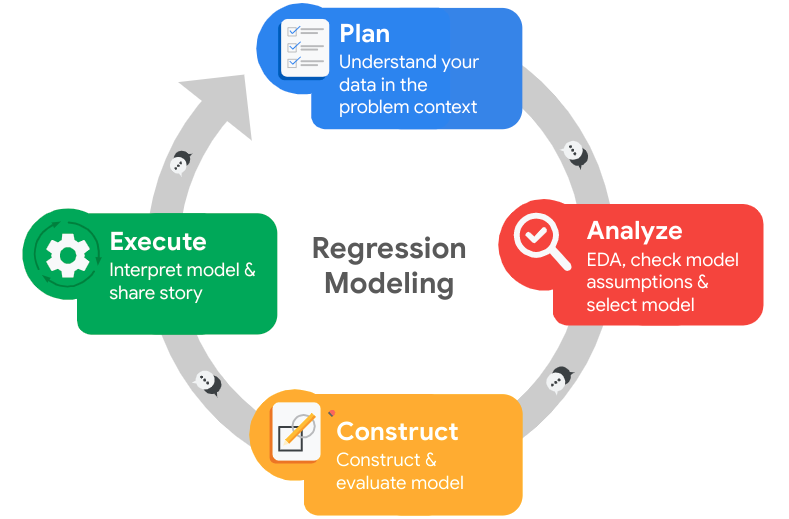

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




> - HR and managerial team are directly addressed with this project deliverables to coordinate decisions to increase employee retention.
> - To explain/predict employee leaving based on the features that are considered to be included in the dataset.
> - Some columns are misspelled. There is no missing values, howver above 3000 rows are duplicated.
> - [*seaborn* documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
> - Several ethial aspects need to be considered throughout the study. The results should directly address the demand purified from biases and prejudices. Data team should also be accountable for the insight they provide for decision makers and should be aligned with company values. Transparency in the alaytical processes is also crucial.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [110]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier, plot_importance

import pickle # to save trained ML models

pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [111]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
path = r'/content/drive/MyDrive/Data Analytics/Google Advanced Data Analytics Certificate/7. Google Advanced Data Analytics Capstone/'
df0 = pd.read_csv(path+"HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe(include= 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
renaming_dict = {'average_montly_hours' : 'average_monthly_hours',
                 'time_spend_company' : 'time_spent_company',
                 'Work_accident' : 'work_accident',
                 'Department' : 'department'
                }
df0 = df0.rename(columns= renaming_dict)


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
df0.isna().sum()


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [ ]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep= False)].sort_values(['average_monthly_hours','satisfaction_level','last_evaluation'])

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
11190,0.28,0.89,4,97,6,0,0,0,management,low
13401,0.28,0.89,4,97,6,0,0,0,management,low
10809,0.51,0.74,6,98,3,0,0,0,support,low
13020,0.51,0.74,6,98,3,0,0,0,support,low
11871,0.77,0.68,3,98,3,0,0,0,support,medium
...,...,...,...,...,...,...,...,...,...,...
566,0.11,0.79,7,310,4,0,1,0,hr,low
12566,0.11,0.79,7,310,4,0,1,0,hr,low
14777,0.11,0.79,7,310,4,0,1,0,hr,low
1936,0.11,0.97,6,310,4,0,1,0,accounting,medium


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Axes: xlabel='average_monthly_hours'>

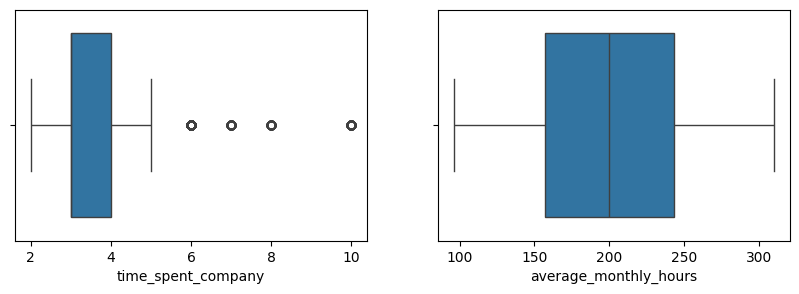

In [112]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.boxplot(x= 'time_spent_company', data= df1, ax= ax[0])
sns.boxplot(x= 'average_monthly_hours', data= df1, ax= ax[1])



In [ ]:
# Determine the number of rows containing outliers
# iqr = df1['time_spent_company'].quantile(0.75) - df1['time_spent_company'].quantile(0.25)
# upper_limit = df1['time_spent_company'].quantile(0.75) + 1.5 * iqr
upper_limit = df1['time_spent_company'].quantile(0.95)

df1 [df1['time_spent_company'] > upper_limit].shape


(282, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




> - Variables look jointly independent.
> - `last_evaluation` `average_monthly_hours` are approximately unformly distributed, while `number_project` is bell-shaped.
> - Categorical variables are transformed to labels for further model constructions.
> - EDA is needed to make sure the data is clean and well-structured first of all, and then it helps to conduct feature engineering to construct best possible models.
> - [*sklearn* documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) ,
    [*seaborn* documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html)
> - We are to recognize the importance and transparency of results for the company. Also minimizing biases will be essential to this end.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
display(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
display(df1['left'].value_counts(normalize= True))


,count
left,
0,10000
1,1991


,proportion
left,
0,0.833959
1,0.166041


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

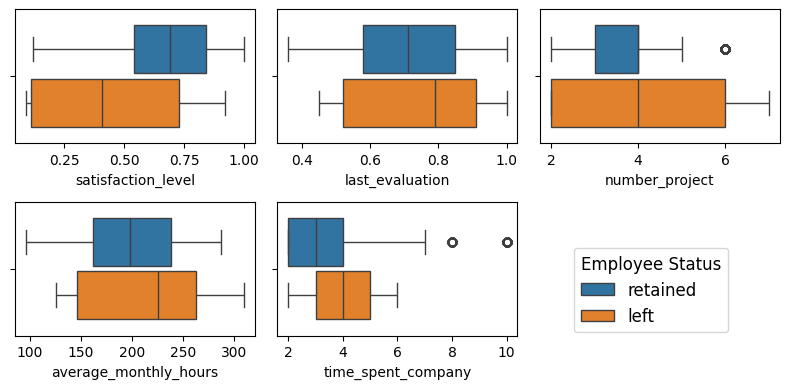

In [113]:
# Create a plot as needed
plot_col = df1.columns.drop(['work_accident','promotion_last_5years','left','department', 'salary'])
n_row= int(np.ceil(len(plot_col)/3))
n_col= 3

fig,ax = plt.subplots(n_row, n_col, figsize=(8,4))
handles, labels = [], [] # Initialize empty lists for handles and labels

for c in range(len(plot_col)):
    # Temporarily enable legend for the first subplot to get handles and labels
    if c == 0:
        sns.boxplot(x= df1[plot_col[c]], hue= df1['left'],
                    orient= 'h',
                    gap=.1,
                    ax= ax[c//3,c%3],
                    legend= True)
        ax[0,0].legend_.remove() # Remove the temporary legend
    else:
        sns.boxplot(x= df1[plot_col[c]], hue= df1['left'],
                    orient= 'h',
                    gap=.1,
                    ax= ax[c//3,c%3],
                    legend= False) # Set legend to False for other subplots


# Remove the axis for the empty subplot
ax[1,2].axis('off')

# Add a single legend to the figure
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, ['retained', 'left'],
           loc='center', bbox_to_anchor=(0.82, 0.26),
           title= 'Employee Status', title_fontproperties= {'size': 12},
           prop= {'size': 12}, alignment= 'left')

plt.tight_layout()
plt.show()

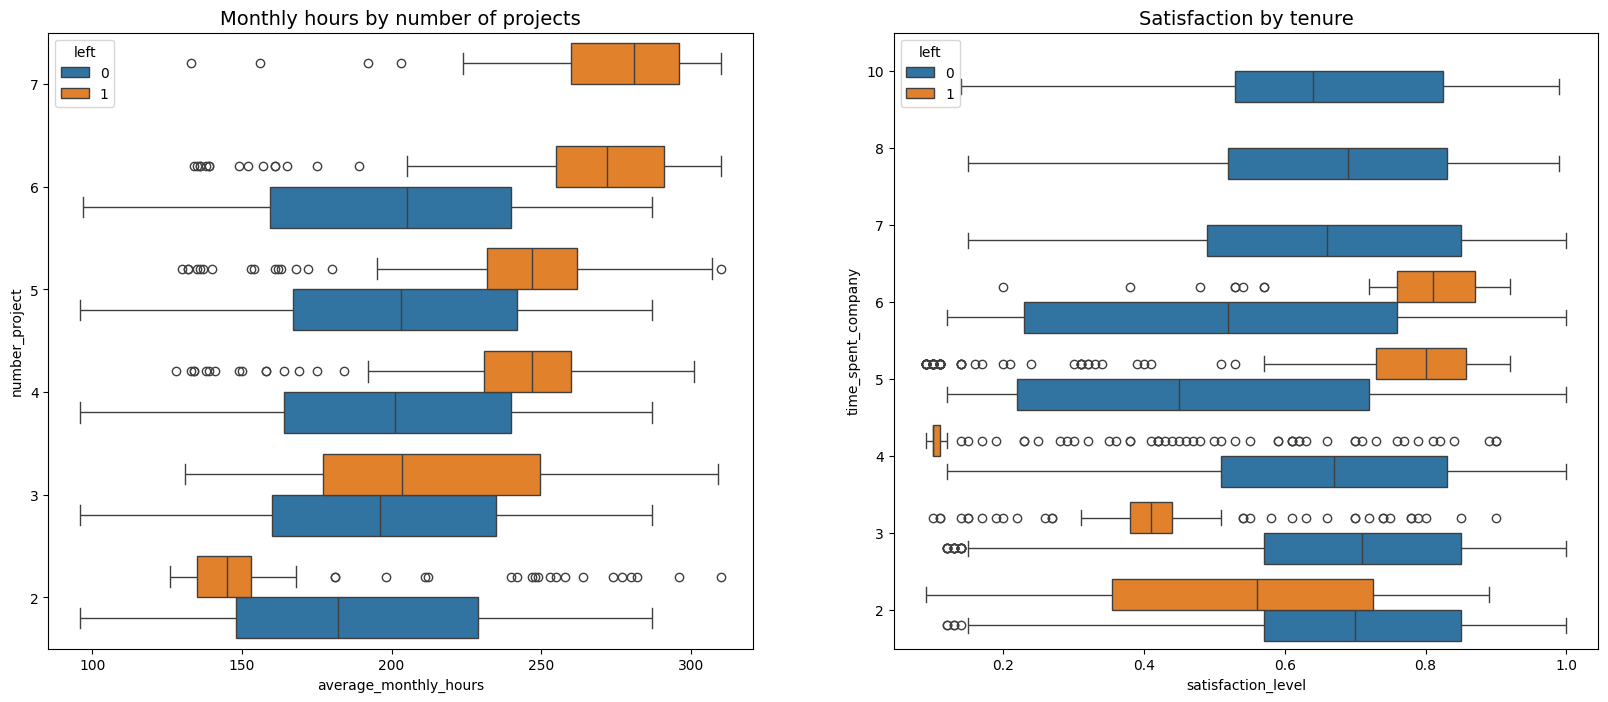

In [123]:
# Set figure and axes
fig, ax = plt.subplots(1,2,figsize = (20,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='time_spent_company', hue='left', orient="h", ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Satisfaction by tenure', fontsize='14')

plt.show();

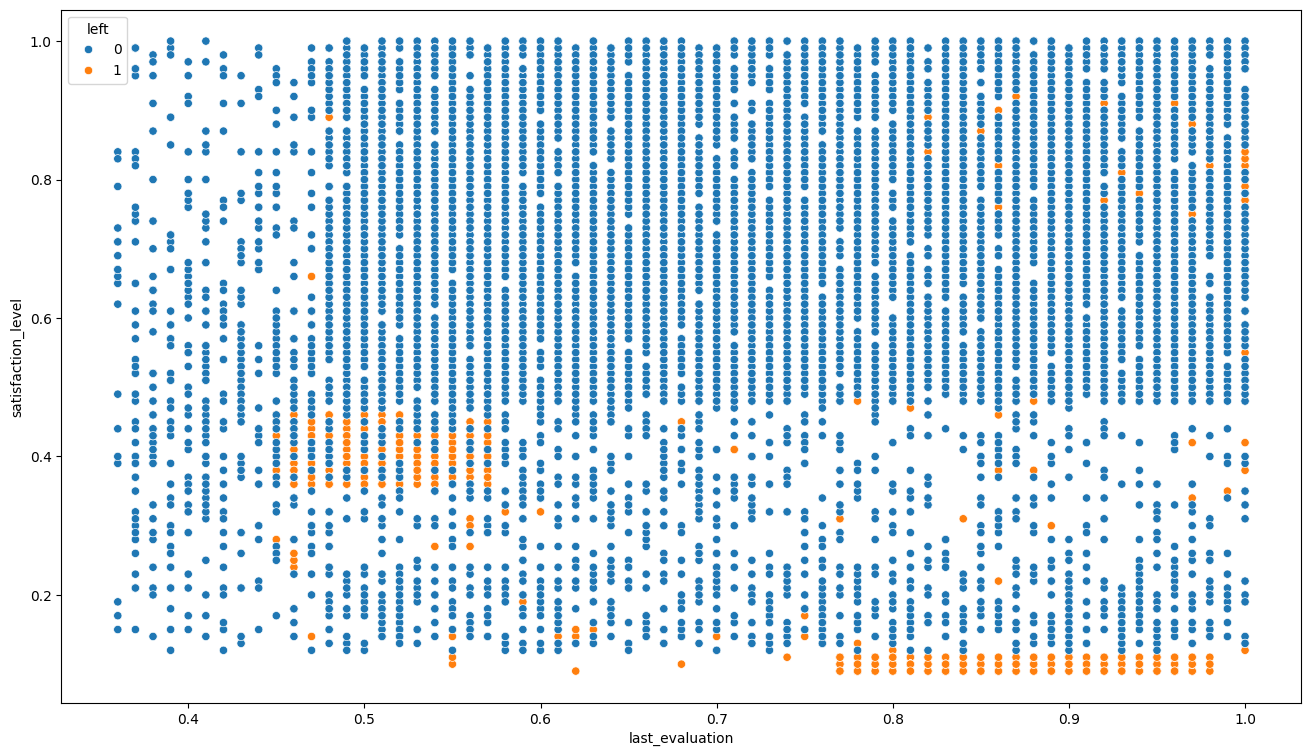

In [115]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(x= 'last_evaluation', y= 'satisfaction_level', hue= 'left', data= df1)
plt.show()

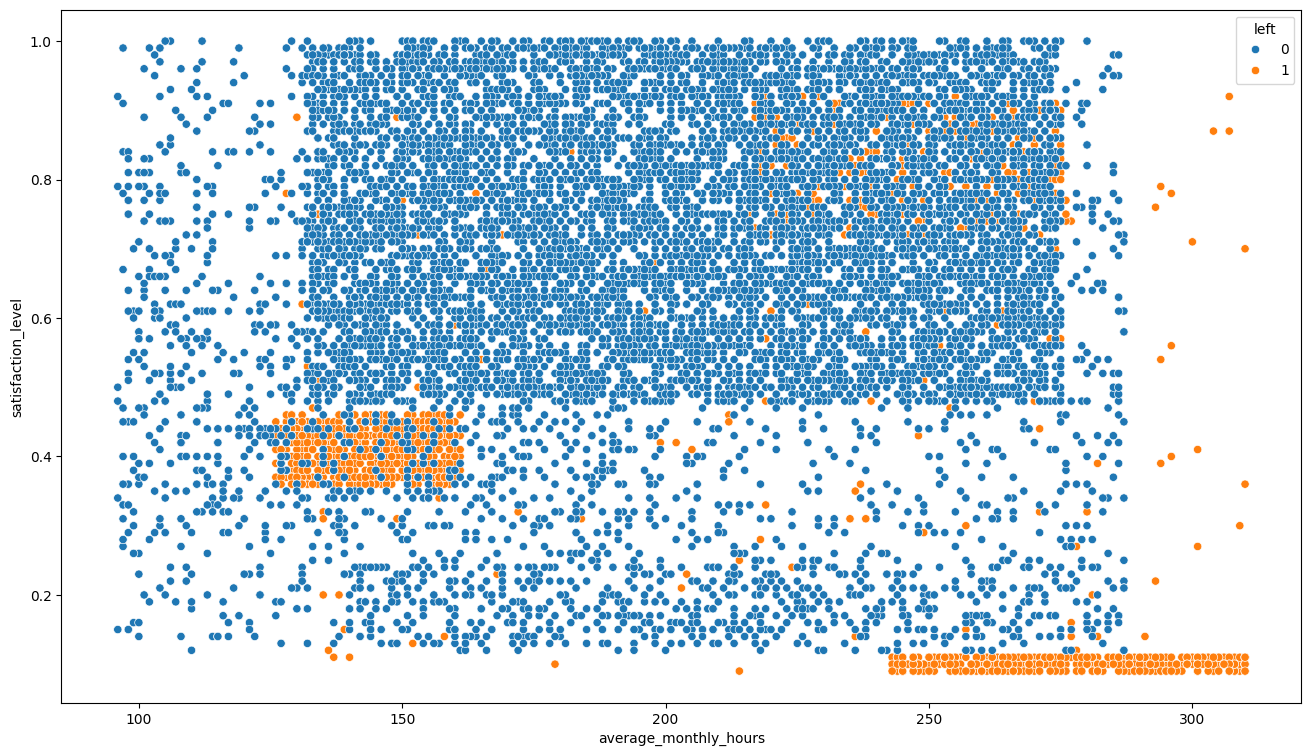

In [116]:

# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(x= 'average_monthly_hours', y= 'satisfaction_level', hue= 'left', data= df1)
plt.show()

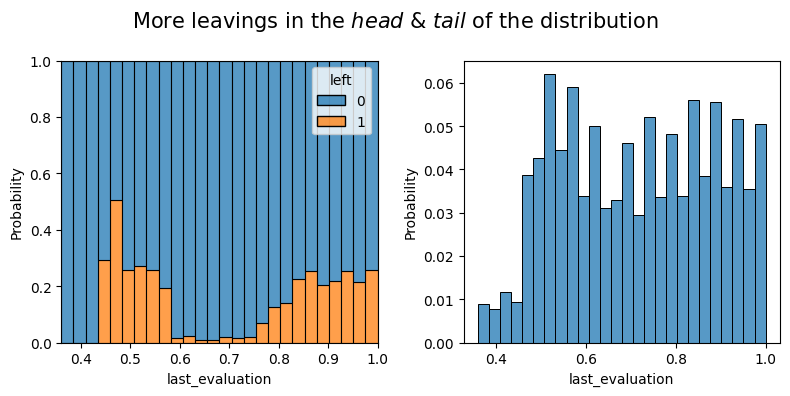

In [ ]:
# Create a plot as needed
fig,ax = plt.subplots(1,2, figsize= (8,4))
sns.histplot(x= df1['last_evaluation'], stat= 'probability', hue= df1['left'], multiple= "fill", ax= ax[0], legend= True)
sns.histplot(x= df1['last_evaluation'], stat= 'probability', ax=ax[1])

sns.move_legend(ax[0], "upper right")

plt.suptitle('More leavings in the $head$ & $tail$ of the distribution', fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 1])

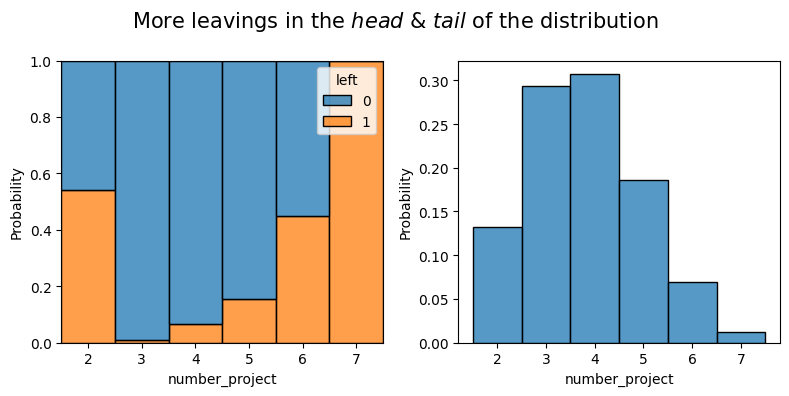

In [ ]:
# Create a plot as needed
fig,ax = plt.subplots(1,2, figsize= (8,4))
sns.histplot(x= df1['number_project'], stat= 'probability', discrete = True,
                                                            hue= df1['left'], multiple= "fill", ax=ax[0])
sns.histplot(x= df1['number_project'], stat= 'probability', discrete = True, ax=ax[1])

plt.suptitle('More leavings in the $head$ & $tail$ of the distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 1])

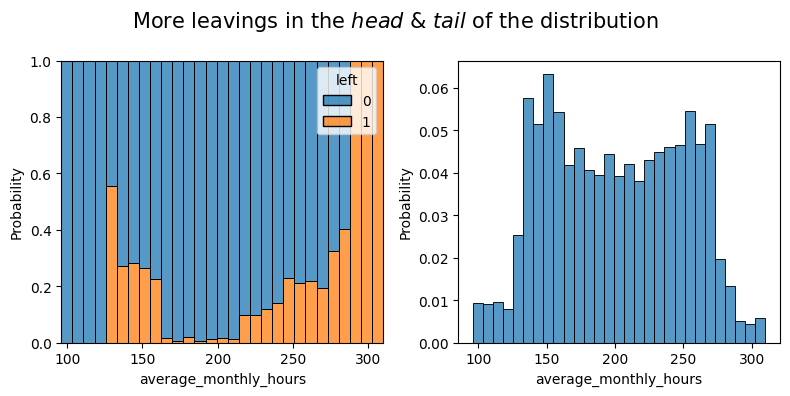

In [ ]:
# Create a plot as needed
fig,ax = plt.subplots(1,2, figsize= (8,4))
sns.histplot(x= df1['average_monthly_hours'], stat= 'probability', hue= df1['left'], multiple= "fill", ax= ax[0])
sns.histplot(x= df1['average_monthly_hours'], stat= 'probability', ax= ax[1])

plt.suptitle('More leavings in the $head$ & $tail$ of the distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 1])

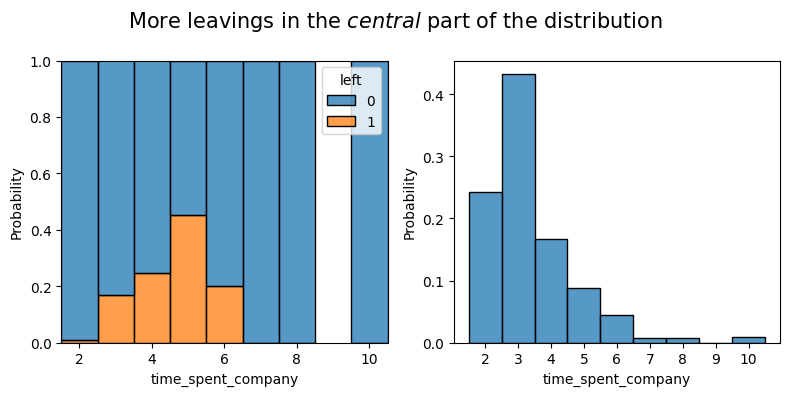

In [ ]:
# Create a plot as needed
fig,ax = plt.subplots(1,2, figsize= (8,4))
sns.histplot(x= df1['time_spent_company'], stat= 'probability', discrete = True,
                                           hue= df1['left'], multiple= "fill", ax= ax[0], legend= True)
sns.histplot(x= df1['time_spent_company'], stat= 'probability', discrete = True, ax=ax[1])

ax[1].set_xticks(np.arange(2,11))

sns.move_legend(ax[0], "upper right")

plt.suptitle('More leavings in the $central$ part of the distribution', fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 1])

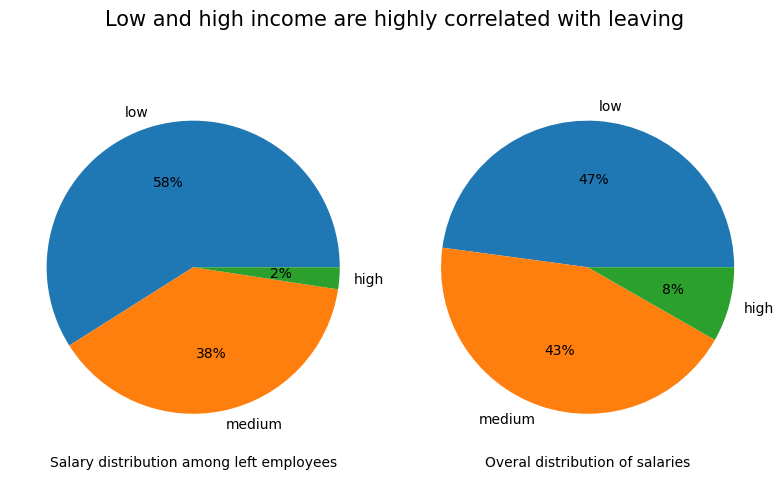

In [ ]:
# Create a plot as needed
fig,ax = plt.subplots(1,2, figsize=(8,5))

# Distribution of departments among left employees
ax[0].pie(x= df1[df1['left']==1]['salary'].value_counts(), labels= df1[df1['left']==1]['salary'].value_counts().index,
                                                             autopct='%1d%%')
ax[0].set_xlabel('Salary distribution among left employees')

# Overal distribution of departments
ax[1].pie(x= df1['salary'].value_counts(), labels= df1['salary'].value_counts().index,
                                                             autopct='%1d%%')
ax[1].set_xlabel('Overal distribution of salaries')

plt.suptitle('Low and high income are highly correlated with leaving', fontsize= 15)

plt.tight_layout()

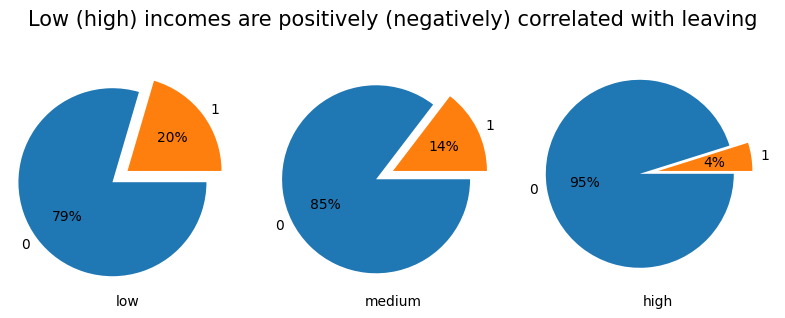

In [ ]:
# Create a plot as needed
fig, ax= plt.subplots(1,3,figsize= (8,3))
for i in range(df1['salary'].nunique()):
    current_dep = df1['salary'].unique()[i]
    df_plot = df1[df1['salary']==current_dep]['left'].value_counts(normalize= True)
    ax[i%3].pie(x= df_plot, labels= df_plot.index,
                     autopct='%1d%%',
                     startangle= 360 * df_plot[1],
                     explode = [0.2, 0],
                     radius= 1)
    ax[i%3].set_xlabel(current_dep)

plt.suptitle('Low (high) incomes are positively (negatively) correlated with leaving', fontsize= 15)

plt.tight_layout()

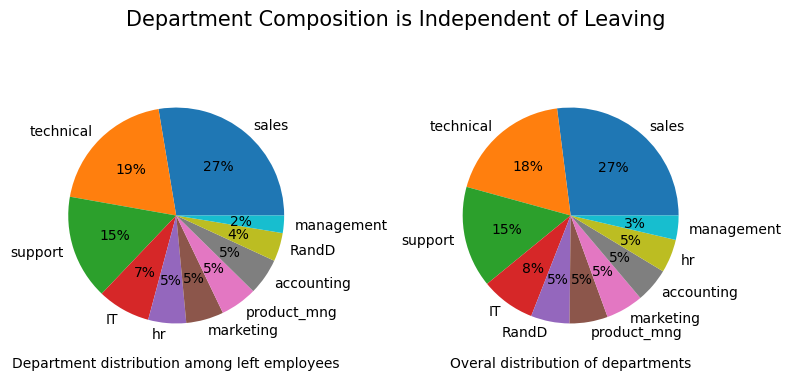

In [ ]:
# Create a plot as needed
fig,ax = plt.subplots(1,2, figsize=(8,4))

# Distribution of departments among left employees
ax[0].pie(x= df1[df1['left']==1]['department'].value_counts(), labels= df1[df1['left']==1]['department'].value_counts().index,
                                                             autopct='%1d%%')
ax[0].set_xlabel('Department distribution among left employees')

# Overal distribution of departments
ax[1].pie(x= df1['department'].value_counts(), labels= df1['department'].value_counts().index,
                                                             autopct='%1d%%')
ax[1].set_xlabel('Overal distribution of departments')

plt.suptitle('Department Composition is Independent of Leaving', fontsize= 15)

plt.tight_layout()

In [ ]:
# # Create a plot as needed
# fig, ax= plt.subplots(2,5,figsize= (10,5))
# for i in range(df1['department'].nunique()):
#     current_dep = df1['department'].unique()[i]
#     df_plot = df1[df1['department']==current_dep]['left'].value_counts(normalize= True)
#     ax[i//5,i%5].pie(x= df_plot, labels= df_plot.index,
#                      autopct='%1d%%',
#                      startangle= 360 * df_plot[1],
#                      explode = [0.2, 0],
#                      radius= 1)
#     ax[i//5,i%5].set_xlabel(current_dep)

# plt.suptitle('Department Composition is Independent of Leaving', fontsize= 15)

# plt.tight_layout()

## Dataframe Preprocessing for Modeling

In [ ]:
df = df1.copy()

# encoding salary categories
salary_dict = {'low':0 , 'medium':1, 'high':2}
df['salary'] = df['salary'].map(salary_dict)

# encoding departments
enc = LabelEncoder()
df['department'] = enc.fit_transform(df['department'])
display(enc.classes_)

df.head(2)

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1


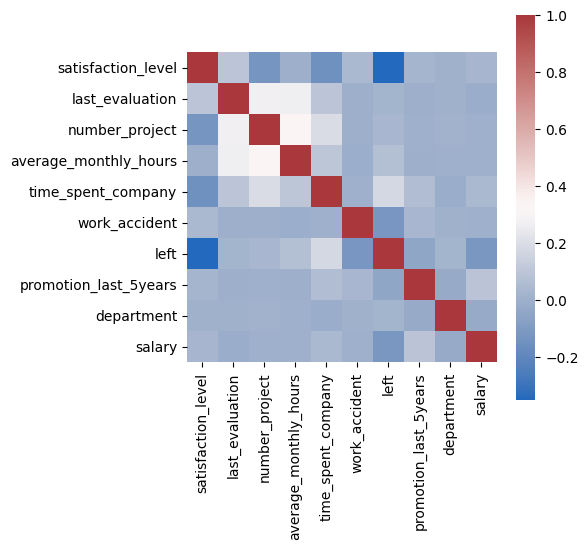

In [122]:
fig,ax = plt.subplots(figsize= (5,5))
sns.heatmap(df.corr(), cmap=sns.color_palette("vlag", as_cmap=True),
                       square= True,
                       ax= ax)
plt.show()

### Insights

> - `satsifaction_level` is directly explaining the `left`. Thus `satisfaction_level` should be studied in more detail.
> - `last_evaluation` among `left` employees has higher mean but with a higher span. It doesn't completely explain the leaving by itself, but indicated employees with too low or too high evaluation are more likely to leave.
> - Same indication holds for `number_project`, as 3 to 4 projects would look ideal for an employee.
> - Same indication holds for `average_monthly_hours`, as 160 to 215 hours contribute to more **retention**.
> - Same indication holds for `time_spent_company`, as 3 to 6 hours contribute to more **leaving**. Values more than 6 years and less than 3 years are less likely to leave.
> - `time_spent_company` has the highest correlation with `satsifaction_level`.
> - More experienced employees are more likely to leave, hence promotional offers would make them more loyal.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



> - Although `salary` was suspected to have considerable effect on the leaving, it playes a slight role in the final model. However, it must have played a role in `satisfaction_level`, hence this score should be investigated further.
> - Except `department` which proved to be independent to leaving, all other variables seemed to affect it.
> - Surprisingly all scores are excellent, even on the test data; specially `recall`, which is crucial in our study, as we don't want to miss many actual leaving employees.
> - Since the model is already performing well and more gradient boosting doesn't improve it much, it may have attained the best model it can become. However there are still concerns about overfitting, hence it should be better to reshuffle the test data to measure the model.
> - [*sklearn* documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [*xgboost* documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html)
> - We made efforts to reduce biases which could affect the result and harm the company reputation. Also, we considered `recall` score the most in order to maximally penalize missing predictions of actually leaving employees.



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

> It's a classification, as the target is a categorical variable.

### Identify the types of models most appropriate for this task.

> For robustness against outliers and scaling of the variables, random forest models (including xgboost) would suit the best, however by ensebmbling other methods such as ligistic regression we will get a champion model in the end.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
# Variables
X = df.drop(columns=['left', 'department'])
y = df.left

# training & test data: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.2, random_state= 42)

In [ ]:
# XGB Classifier instantiation
xgb = XGBClassifier(objective= 'binary:logistic')

# Cross Validation to find best xgb among following parameters
cv_params = {'max_depth'       : [5,8,10],
             'min_child_weight': [1,3,5],
             'learning_rate'   : [0.1,0.3],
             'n_estimators'    : [100]
            }
scoring   = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(estimator= xgb, param_grid= cv_params, scoring= scoring, cv= 5, refit= 'f1')


In [ ]:
%%time

# fit & Cross-Validate
# xgb_cv.fit(X_train, y_train)

CPU times: user 23.1 s, sys: 312 ms, total: 23.4 s
Wall time: 13.7 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [5, 8, 10],
                         'min_child_weight': [1, 3, 5], 'n_estimators': [100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
path = '/content/drive/MyDrive/Data Analytics/Google Advanced Data Analytics Certificate/7. Google Advanced Data Analytics Capstone/'

# Save xgb_cv via pickle
# with open(path+'xgb_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(xgb_cv, to_write)

In [ ]:
path = '/content/drive/MyDrive/Data Analytics/Google Advanced Data Analytics Certificate/7. Google Advanced Data Analytics Capstone/'

# load xgb_cv via pickle
with open(path+'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [ ]:
pd.set_option('display.max_colwidth', None)

results = pd.DataFrame(xgb_cv.cv_results_).sort_values('mean_test_f1', ascending= False)\
                                  [['params',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1']].head(5).copy()
results

,params,mean_test_recall,mean_test_precision,mean_test_f1
3,"{'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}",0.917764,0.984483,0.949930
6,"{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}",0.917133,0.983162,0.948973
0,"{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}",0.920276,0.976686,0.947606
7,"{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 100}",0.916512,0.978527,0.946475
15,"{'learning_rate': 0.3, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}",0.914627,0.977821,0.945151


In [ ]:
xgb_cv_preds = xgb_cv.predict(X_test)
print('F1 score of the best XGB model       : ', round(f1_score       (y_test, xgb_cv_preds),2) )
print('Recall score of the best XGB model   : ', round(recall_score   (y_test, xgb_cv_preds),2) )
print('Precision score of the best XGB model: ', round(precision_score(y_test, xgb_cv_preds),2) )
print('Accuracy score of the best XGB model : ', round(accuracy_score (y_test, xgb_cv_preds),2) )

F1 score of the best XGB model       :  0.95
Recall score of the best XGB model   :  0.93
Precision score of the best XGB model:  0.98
Accuracy score of the best XGB model :  0.98


### Confusion Matrix on Test Data

In [ ]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot()
    plt.show()

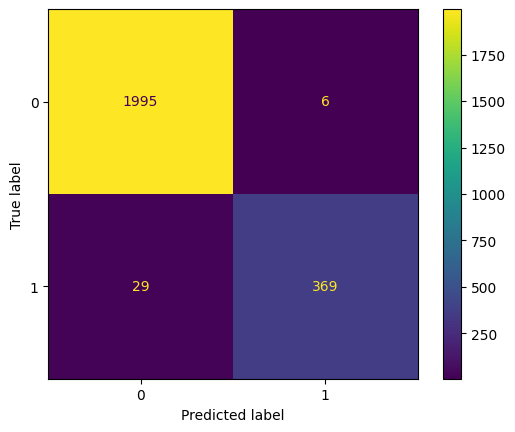

In [ ]:
conf_matrix_plot(xgb_cv, X_test, y_test)

### Feature Importance

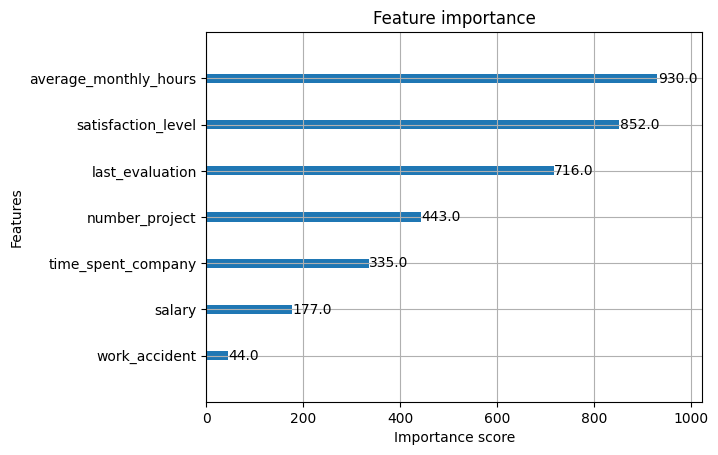

In [ ]:
plot_importance(xgb_cv.best_estimator_, max_num_features= None)
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



> - Key features in the model are as expected, however `satisfaction_level` should be digged to understand how it is calculated. The model also performs great scores.
> - Making decisions to regulate the most important features to minimize leaving, e.g.:
>    - policing `average_monthly_hours` to suit employee statisfaction.
>    - regulating `number_projects`
>    - motivating packages for employees between 3 to 5 years of presence in the company.
> - `satisfaction_level` should be studied in details as it doesn't show by itself what exactly has the highest impact on that, yet it is the 2nd most important feature in the model.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

> *   The model recognizes the following top 5 influential features on employees leaving:
>     1. `average_monthly_hours`
>     2. `satisfaction_level`
>     3. `last_evaluation`
>     4. `number_projects`
>     5. `time_spent_company`
> - `department` was left out of the model, as it has no significant effect on leaving.
> - The champion model predicts `left` employees with excellent scores. The main score of interest was `recall`, with ***93% score***, to penalize actual leaving employees who are mispredicted as retaining.



### Conclusion, Recommendations, Next Steps

> *   `satisfaction_level` must be examined in more details, as it certainly contains fundamental criteria for leaving or retention.
> * A reshuffling in train-test data is suggested to make sure the model is not overfitted to current data.
> As the model does not specify in what way the most important features affect `left` variable, we can use the insights from EDA part to help decision makers regarding the sensetivity of the result with respect to features.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.